<h1>Introduction to Scikit-Learn<h1><h2>skLearn</h2>
This note book explains about some important features and functions of scikit-learn library<div>
What we are going to cover:<div>
0. An end to end scikit learn workflow <div>
1. Getting the data ready<div>
2. Choose the right estimator or ML model or model/algorithm for our problems <div>
3. Fit the model/algorithm  and use it to make predictions on our data<div>
4. Evaluating a model<div>
5. Improve a model<div>
6. Save and load a trained model<div>
7. ,Putting it all together!!




## An end to end scikit learn work flow 

In [107]:
# 1.Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
# Create X which is features matrix
x = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [109]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
#we will keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [111]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [113]:
y_test

78     1
71     1
152    1
281    0
206    0
      ..
0      1
19     1
282    0
291    0
56     1
Name: target, Length: 61, dtype: int64

In [114]:
#4. Evaluate the model on the training data and the test data
clf.score(x_train,y_train)


1.0

In [115]:
clf.score(x_test,y_test)

0.8032786885245902

In [116]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.89      0.81      0.85        42

    accuracy                           0.80        61
   macro avg       0.77      0.80      0.78        61
weighted avg       0.82      0.80      0.81        61



In [117]:
confusion_matrix(y_test,y_pred)

array([[15,  4],
       [ 8, 34]], dtype=int64)

In [118]:
accuracy_score(y_test,y_pred)

0.8032786885245902

In [119]:
# improve a model
# try different types of n_estimators
import random 
import numpy  as np

In [120]:
np.random.seed(42)
for i in range(10,80,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set{clf.score(x_test,y_test) * 100:.2f}%")
    print()

Trying model with 10 estimators
Model accuracy on test set75.41%

Trying model with 20 estimators
Model accuracy on test set73.77%

Trying model with 30 estimators
Model accuracy on test set75.41%

Trying model with 40 estimators
Model accuracy on test set75.41%

Trying model with 50 estimators
Model accuracy on test set78.69%

Trying model with 60 estimators
Model accuracy on test set78.69%

Trying model with 70 estimators
Model accuracy on test set78.69%



In [121]:
#save a model and load it
import pickle 
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [122]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7868852459016393

In [123]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
executable: c:\Users\bharg\AppData\Local\Programs\Python\Python312\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 25.2
   setuptools: 70.2.0
        numpy: 1.26.4
        scipy: 1.14.0
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 16
         prefix: libopenblas
       filepath: C:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Prescott

       user_api: openmp
   internal_api: openmp
    num_threads: 16
         prefix: vcomp
       filepath: C:\Users\bharg\AppData\Local\Pr

## 1. Getting our data ready with machine learning
### Three main things we have to do:
<div>
1. Split the data into features and labels (usually `x` and `y`)<div>
2.Filling (also called imputing) or disregarding missing values<div>
3.Converting values to numeric values(also called feature encoding)



In [124]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

In [126]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [127]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numeric

In [128]:
car_sales = pd.read_csv("car-sales-extended.csv")
len(car_sales)

1000

In [129]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [130]:
#split into x/y
X = car_sales.drop("Price",axis =1)
Y = car_sales["Price"]
# Split into training and test data
from sklearn.model_selection import train_test_split 
X_Train ,X_Test ,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(handle_unknown="ignore")  # good practice
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [132]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [133]:
dummy = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummy

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [134]:
#Lets refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)
X_Train,X_Test,Y_Train,Y_Test = train_test_split(transformed_x,Y,test_size =0.2)
model.fit(X_Train,Y_Train)


RandomForestRegressor()

In [135]:
model.score(X_Test, Y_Test)

0.3235867221569877

In [136]:
import sklearn
print(sklearn.__version__)

1.5.1


### 1.2 What if there are missing values in the data
1.fill them wiht some values (also called as imputation)<div>
2.Remove the samples with missing data altogether


In [137]:
car_sales_missed = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missed.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [138]:
# create new x and y like for new label like 'a' and 'b'
a = car_sales_missed.drop("Price",axis=1)
b = car_sales_missed["Price"] 


In [139]:
#lets try to convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features_new = ["Make","Colour","Doors"]
one_hot_new = OneHotEncoder(handle_unknown="ignore")

transformer_new = ColumnTransformer(
    [("one_hot", one_hot_new, categorical_features)],  # notice here
    remainder="passthrough", force_int_remainder_cols=False
)
transformed_new_a =transformer_new.fit_transform(a)
transformed_new_a

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [140]:
a_train,a_test ,b_train,b_test = train_test_split(transformed_new_a,b,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)



## option 1 : Fill missing values using pandas module 

In [141]:
car_sales_missed.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [142]:
#fill the Make column
car_sales_missed["Make"].fillna("missing",inplace = True)

#fill the Colour column
car_sales_missed["Colour"].fillna("missing", inplace = True)

#fill the Odometer (KM) column
car_sales_missed["Odometer (KM)"].fillna(car_sales_missed["Odometer (KM)"].mean(), inplace = True)

#Fill the doors column
car_sales_missed["Doors"].fillna(car_sales_missed["Doors"].fillna(4),inplace=True)


C:\Users\bharg\AppData\Local\Temp\ipykernel_51636\388623958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missed["Make"].fillna("missing",inplace = True)
C:\Users\bharg\AppData\Local\Temp\ipykernel_51636\388623958.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
car_a = car_sales_missed.drop("Price", axis=1)
car_b = car_sales_missed["Price"]

# lets try to convert our data into numbers
categorical_features_new = ["Make", "Colour", "Doors"]
one_hot_new = OneHotEncoder(handle_unknown="ignore")

transformer_new = ColumnTransformer(
    [("one_hot", one_hot_new, categorical_features)],  # notice here
    remainder="passthrough", force_int_remainder_cols=False
)

car_a_train, car_a_Test, car_b_Train, car_b_Test = train_test_split(
    transformed_x, Y, test_size=0.2)
transformed_new_a = transformer_new.fit_transform(car_sales_missed)
transformed_new_a

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [144]:
car_sales_missed.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

above are the codes that we handled missing values with pandas

below are the codes handling with sklearn

In [145]:
car_sales_missed_ex = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missed_ex.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [146]:
# drop the rows with no labels or without values
car_sales_missed_ex.dropna(subset=["Price"], inplace=True)
car_sales_missed_ex

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [147]:
car_sales_missed_ex.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [148]:
s = car_sales_missed_ex.drop("Price",axis=1)
z = np.array(car_sales_missed_ex["Price"])
z


array([15323., 19943., 28343., 13434., 14043., 23883.,  8473., 20306.,
        9374., 26683., 16259.,  6160., 16909., 11121., 18946., 16290.,
       34465., 17177.,  9109.,  6010., 24130., 29653., 22489., 21242.,
       14274., 15686., 13344., 10984.,  6135., 13586., 23929.,  6866.,
        9330.,  9780., 17516.,  8738., 23438., 15131.,  9224.,  6574.,
        9229.,  7100.,  6337., 19085.,  5743.,  5925., 25196., 16138.,
        6075.,  9928.,  7445., 13698., 17422.,  8269.,  9918., 48686.,
       15662., 19186., 11479., 12883., 24668., 12172., 25068., 20370.,
        5383., 18396.,  9648.,  6652.,  6386., 32379., 22436.,  6860.,
        5648., 12001., 18355., 20424., 15154., 18484.,  6502., 18310.,
        8200., 20142., 13199.,  5708., 13430., 10283.,  3300., 20936.,
       18160., 35988.,  5776., 18595.,  6481.,  6283.,  6762., 16337.,
       11392., 16519., 22296., 12196., 14202., 13250.,  7404.,  5316.,
       10125., 13614., 13283., 11584., 15617.,  4747.,  6391., 17802.,
      

In [149]:
#Filling missing values with sk-Learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Filling missing values with "missing" and price value or numerical values with mean ,mode or median
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer that fills the missing data
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_x = imputer.fit_transform(s)



In [150]:
car_sales_j3 = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors","Odometer (KM)"])
car_sales_j3.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features_j3 = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer_j3 = ColumnTransformer(
    [("one_hot",one_hot,categorical_features_j3)],remainder="passthrough"
)
transformed_x_j3 = transformer_j3.fit_transform(car_sales_j3)
transformed_x_j3

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [152]:
#Now we've got out data as numbers and filled (no missing values)
#lets fit the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train_bt, x_test_bt, y_train_bt, y_test_bt = train_test_split(
    transformed_x_j3, z, test_size=0.2
)

model_bt = RandomForestRegressor(n_estimators=100)
model_bt.fit(x_train_bt, y_train_bt)

model_bt.score(x_test_bt, y_test_bt)

0.2907672000776358

## 2.Choosing the right estimator/algorithm for your problem 

Some things to note:<div>
1.sklearn refers to machine learning models,algoritms as estimators <div>
2.classification problem -predicting a category (heart-disease or not)
    sometimes you'll see 'clf' (short form for classifier used as classification estimator) m<div>
3. Regression problem - predicting a number (selling price of car)

In [153]:
%%HTML
aimg = <img src="sklearnwhichmodel.png" alt="Description of Image" width="500">


###2.1 picking a machine learning model for regression problem
#let's use the california house datasets

#to check how these datasets are coming from refer sklearn datasets

#get the california housing datasets


In [154]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [155]:
housing_df =pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]= housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# beautiful

In [156]:
#import algorithm
from sklearn.ensemble import RandomForestRegressor
#set up random seed
np.random.seed(42)

#Create the data

hx = housing_df.drop("target",axis =1)
hy = housing_df["target"] # median house price in $100,000s

#split the data into tain and test sets

hx_train,hx_test,hy_train,hy_test = train_test_split(hx,hy,test_size=0.2)

#instantiate and fit the model (on the training set)

#check the picture map of teh which to choose the ml model or estimator
# and experiment on the models to get a better model 

# so when we go through it it we came across the regression block and stuck at different ml things like 
# so we gonna experiment on these

# so in the regression we come across the 1.RidgeRegression 2.EnsembleREgressor 3.ElasticNet 4.Regressor

# then lets try with Ridge Regressor......................................



In [157]:
model =RandomForestRegressor()
model.fit(hx_train,hy_train)

#check the score of the model
model.score(hx_test,hy_test)

0.806652667101436

# 2.2 Choosing an Estimator for a classification Problem

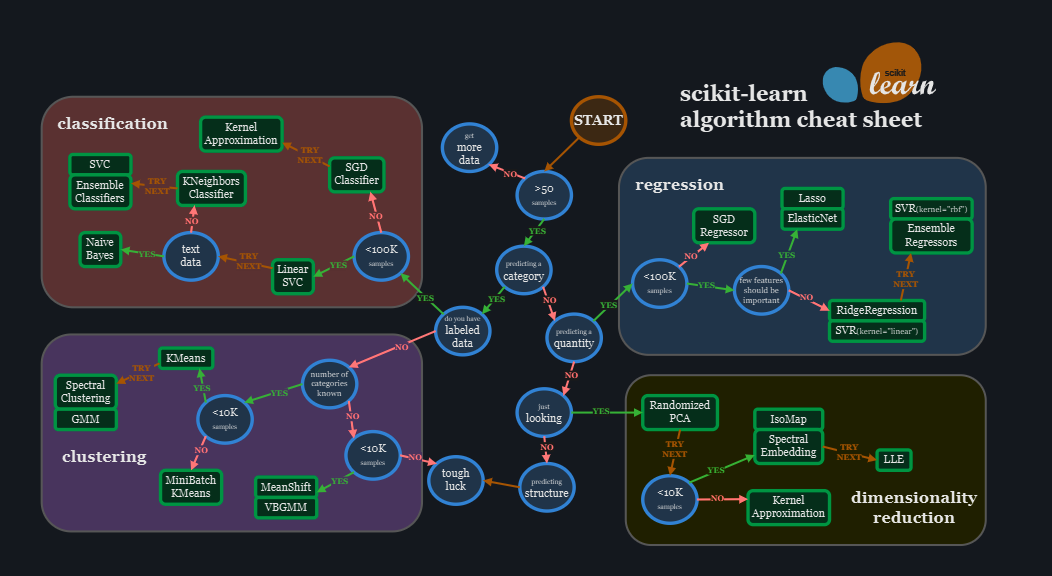

In [158]:
from IPython.display import Image, display

my_img = Image(filename="sklearnwhichmodel.png")  # assign
display(my_img)  # show the image

In [159]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# consulting the map it tires to say to use the model of `linearSVC`

In [160]:
#import linearSVC
from sklearn.svm  import SVC

#set up random seed
np.random.seed(42)

#make the data
x_hd = heart_disease.drop("target",axis=1)
y_hd = heart_disease["target"]
x_hd_train ,x_hd_test,y_hd_train,y_hd_test = train_test_split(x_hd,y_hd,test_size=0.2)

#instantiate linear svc
clf = SVC()
# fit the data into the model
clf.fit(x_hd_train,y_hd_train)

# evaluate the model 
clf.score(x_hd_test,y_hd_test)


0.7049180327868853

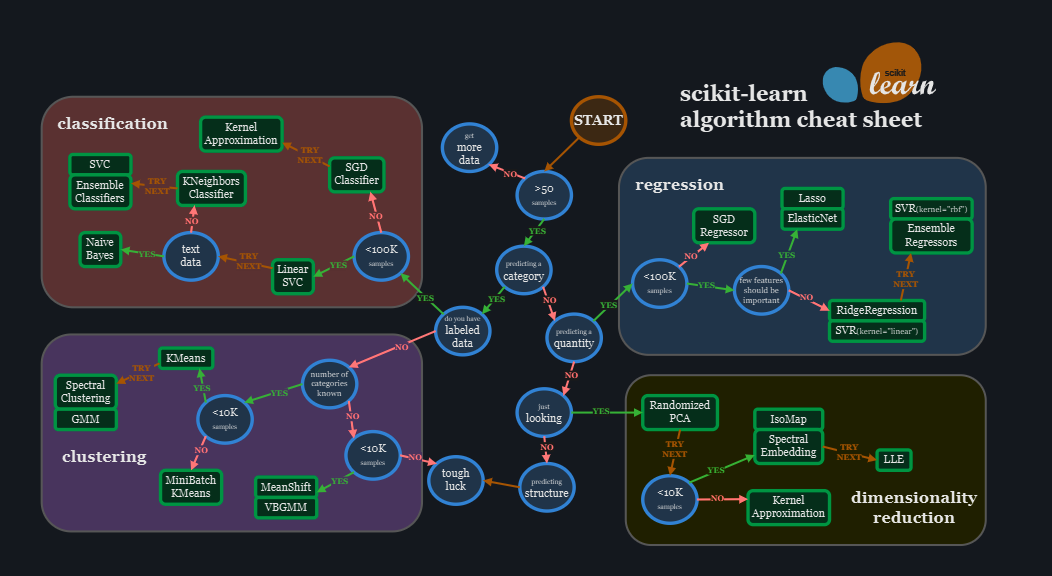

In [161]:
my_img

### if we check in the image our linear SVC doesnt work well if we go deeper 
### we come across the SVC of ensembel classifiers where it works well and gives the output of 80 accuaracy

Tidbit:<div>
    1.If you have structured data,used ensemble mehtods<div>
    2.If you have unstructed data ,use deeplearning or transfer learning<div>

# Fitting a model to the DATA
Different names for:
* `x` = features,features variables,data<div>
* `y` = labels ,targets,target variables

In [162]:
# import linearSVC
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# make the data
x_hd = heart_disease.drop("target", axis=1)
y_hd = heart_disease["target"]
x_hd_train, x_hd_test, y_hd_train, y_hd_test = train_test_split(
    x_hd, y_hd, test_size=0.2)

# instantiate linear svc
clf = RandomForestClassifier()
# fit the data into the model
clf.fit(x_hd_train, y_hd_train)

# evaluate the model
clf.score(x_hd_test, y_hd_test)

0.8524590163934426

In [163]:
x_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Making predictions using a machine learning model<div>
### Two ways to make predictions <div>
* using `predict()`
* using `predict_proba()`


In [164]:
clf.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [165]:
# compare predictions to the truth label to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9344262295081968

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.9344262295081968

#### make predictions with `predict_proba()`


In [167]:
clf.predict_proba(x_test)

array([[0.  , 1.  ],
       [0.11, 0.89],
       [0.51, 0.49],
       [0.39, 0.61],
       [0.96, 0.04],
       [0.83, 0.17],
       [0.98, 0.02],
       [0.21, 0.79],
       [0.04, 0.96],
       [0.06, 0.94],
       [0.93, 0.07],
       [0.17, 0.83],
       [0.03, 0.97],
       [0.38, 0.62],
       [0.05, 0.95],
       [0.96, 0.04],
       [0.22, 0.78],
       [0.84, 0.16],
       [0.03, 0.97],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.69, 0.31],
       [0.13, 0.87],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.01, 0.99],
       [0.81, 0.19],
       [0.11, 0.89],
       [0.2 , 0.8 ],
       [0.18, 0.82],
       [0.11, 0.89],
       [0.16, 0.84],
       [0.02, 0.98],
       [0.7 , 0.3 ],
       [0.38, 0.62],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.1 , 0.9 ],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.44, 0.56],
       [0.47, 0.53],
       [0.12,

In [168]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for the regression models.

In [169]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x_01 = housing_df.drop("target",axis =1)
y_01 = housing_df["target"]

x_01_train ,x_01_test,y_01_train,y_01_test = train_test_split(x_01,y_01,test_size=0.2)

model_01 = RandomForestRegressor()
model_01.fit(x_01_train,y_01_train)

y_preds_01 = model.predict(x_01_test)
y_preds_01[:10]


array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [170]:
np.array(y_01_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [171]:
len(y_preds_01), len(np.array(y_01_test))

(4128, 4128)

In [172]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_01_test, y_preds_01)

0.32656738464147306

## Evaluating the machine learning model

### Three ways to evaluate scikitlearn model:<div>
* Estimator's `built- int score() model`
* The `Scoring`  parameter
* Problem -specific metric functions
* To learn about more about these topics refer to https://scikit-learn.org/stable/modules/model_evaluation.html

In [173]:
### 4.1 evaluating model with score method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create x and y


## evaluating the model using scoring parameter

In [174]:
from sklearn.model_selection import cross_val_score
# import linearSVC
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# make the data
x_hd = heart_disease.drop("target", axis=1)
y_hd = heart_disease["target"]
x_hd_train, x_hd_test, y_hd_train, y_hd_test = train_test_split(
    x_hd, y_hd, test_size=0.2)

# instantiate linear svc
clf = RandomForestClassifier()

clf.fit(x_hd_train, y_hd_train)

# evaluate the model
clf.score(x_hd_test, y_hd_test)

0.8524590163934426

In [175]:
cross_val_score(clf,x_hd,y_hd)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [176]:
#to check weather the mean of the cross_val_scores are relatable to the clf.score
np.mean(cross_val_score(clf,x_hd,y_hd))

0.8183606557377049

### 4.2.1 Classification model evaluation metrics<div>

1. Accuaracy <div>
2. Area under ROC Curve<div>
3. Confusion matrix<div>
4. Classification report<div>

**ACCURACY**

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

x_hd = heart_disease.drop("target", axis=1)
y_hd = heart_disease["target"]

# instantiate 
clf = RandomForestClassifier()
cross_val_score(clf,x,y)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

#### Area under the Roc(Reciever Operating Characteristics) curve or Auc curve

In [178]:
from sklearn.metrics import roc_curve
# import RandomForestC
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# make the data
x_hd = heart_disease.drop("target", axis=1)
y_hd = heart_disease["target"]
x_hd_train, x_hd_test, y_hd_train, y_hd_test = train_test_split(
    x_hd, y_hd, test_size=0.2)

# instantiate linear svc
clf = RandomForestClassifier()
clf.fit(x_hd_train,y_hd_train)
y_probs = clf.predict_proba(x_hd_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [179]:
y_probs_pos = y_probs[:,1]


In [180]:
#Calculate fpr ,tpr  and thresholds
fpr,tpr ,thresholds = roc_curve(y_hd_test,y_probs_pos)

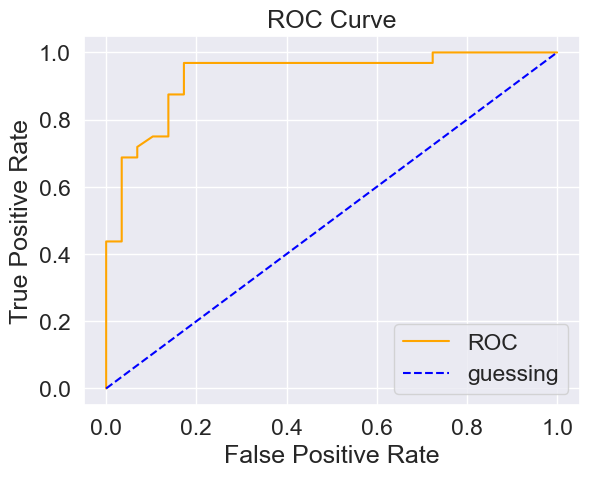

In [181]:
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr):
    """plot a roc curve given for fpr and tpr of a model"""
    # plot the ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot baseline (random guessing: diagonal line)
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="guessing")

    # axis labels and title
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)

In [182]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_hd_test,y_probs_pos)

0.9304956896551724

## Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels 
it was supposed to predict <div>
In Essence giving you an idea of where the model is getting confused

In [183]:
from sklearn.metrics import confusion_matrix
y_hd_preds = clf.predict(x_hd_test)
confusion_matrix(y_hd_test,y_hd_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [184]:
pd.crosstab(y_hd_test,y_hd_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


<Axes: >

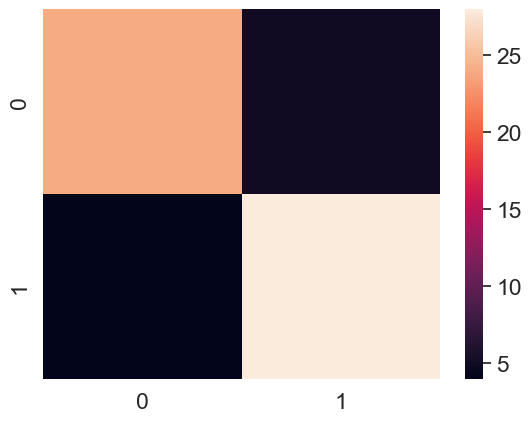

In [185]:
import seaborn as sns 
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_hd_test,y_hd_preds)
sns.heatmap(conf_mat)


we are doing the confusion matrix on the classificaton model 


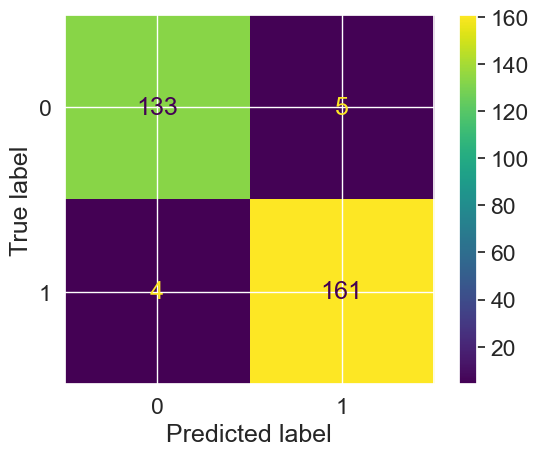

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X=x_hd,
    y=y_hd   # not Y= , it should be lowercase 'y'
);

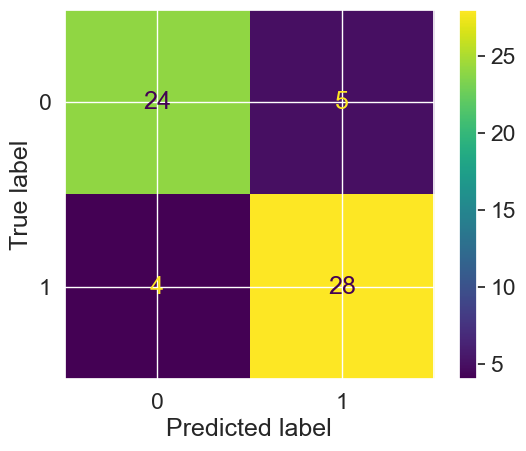

In [187]:
ConfusionMatrixDisplay.from_predictions(y_hd_test,y_hd_preds)

### Classification Report

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_hd_test,y_hd_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [189]:
dis = np.zeros(10000)
dis[0] = 1
dis_pred = np.zeros(10000)
pd.DataFrame(classification_report(dis,dis_pred,output_dict=True))



c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics

The ones we are going to cover are:<div>
    * R^2  or coeffecient of determination<div>
    * mean absolute error <div>
    * mean squared error <div>
    

***Mean mean_absolute_error***

In [190]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor
# set up random seed
np.random.seed(42)

# Create the data

hx = housing_df.drop("target", axis=1)
hy = housing_df["target"]  # median house price in $100,000s

# split the data into tain and test sets

hx_train, hx_test, hy_train, hy_test = train_test_split(hx, hy, test_size=0.2)


model_h = RandomForestRegressor()
model_h.fit(hx_train,hy_train)
# instantiate and fit the model (on the training set)
from sklearn.metrics import mean_absolute_error
y_preds_housing = model_h.predict(hx_test)
mae = mean_absolute_error(hy_test,y_preds_housing)
mae

0.32656738464147306

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values 

In [191]:
from sklearn.metrics import mean_squared_error
mse =mean_squared_error(hy_test,y_preds_housing)
mse

0.25336408094921037

# 4.2.3 Evaluating a model with cross validation  and scoring parameter

Finally using the `Scoring` parameter

In [192]:
from sklearn.model_selection import cross_val_score
# import RandomForestC
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# make the data
x_hd = heart_disease.drop("target", axis=1)
y_hd = heart_disease["target"]
# instantiate linear svc
clf = RandomForestClassifier()


In [193]:
cv_acc = cross_val_score(clf,x_hd,y_hd,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [194]:
np.mean(cv_acc)

0.8248087431693989

In [195]:
#Precision
cv_precision = cross_val_score(clf,x_hd,y_hd,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [196]:
np.mean(cv_precision)

0.8085601538512754

In [197]:
np.random.seed(42)
cv_recall = cross_val_score(clf,x_hd,y_hd,cv=5,scoring="recall")
cv_recall


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [198]:
np.mean(cv_recall)

0.8545454545454545

Let's use the scoring parameter for the regression model

In [199]:
# import algorithm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# set up random seed
np.random.seed(42)

# Create the data

hx = housing_df.drop("target", axis=1)
hy = housing_df["target"]  # median house price in $100,000s

# split the data into tain and test sets

model_h = RandomForestRegressor()

In [200]:
# accuarcy 
cv_acc_reg = cross_val_score(model_h,hx,hy,cv = 5)
cv_acc_reg

KeyboardInterrupt: 

In [ ]:
np.mean(cv_acc_reg)

0.6521550148270838

In [ ]:
cv_nmse_reg = cross_val_score(model_h,hx,hy,cv=3,scoring = "neg_mean_squared_error")
cv_nmse_reg

array([-0.5121194 , -0.32876445, -0.52885778])

In [ ]:
cv_mse_reg = cross_val_score(
    model_h, hx, hy, cv=3, scoring="neg_mean_absolute_error")
cv_mse_reg

array([-0.51292963, -0.42556156, -0.50901443])

4.3 use different evaluation metrics fromm scikit- learn functions

The 3 rd way fo evaluating the models 

# 5 . Improving a Model

first predictions are baseline predictions

first model = baseline model

parameters or data parameters = model which find in the data during making the patterns
<div>
hyperparameters = parameters which makes our model more strong or better which means through which you can change the settings or ability to improve it's performance to find patterns

## 5.1 Tuning hyperparamters by HAND

let's make three sets ie. train set ,validation set and test set

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjsut <div>
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


def evaluate_preds(y_true, y_pred):
    """
    Performs evaluation comparison on y_true_labels vs y_pred_labels on classification models
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }

    print(f"Acc: {accuracy*100:.2f}")
    print(f"Prec: {precision*100:.2f}")
    print(f"Recall: {recall*100:.2f}")
    print(f"F1: {f1*100:.2f}")

    return metric_dict

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac =1,random_state=42)
x_hp = heart_disease_shuffled.drop("target",axis=1)
y_hp = heart_disease_shuffled["target"]

In [ ]:
train_split = round(0.7*len(heart_disease_shuffled))
valid_split  =round(0.85*len(heart_disease_shuffled))

x_train_hp, y_train_hp = x_hp[:train_split], y_hp[:train_split]
x_valid,    y_valid = x_hp[train_split:valid_split], y_hp[train_split:valid_split]
x_test_hp,  y_test_hp = x_hp[valid_split:], y_hp[valid_split:]


clf = RandomForestClassifier()


clf.fit(x_train_hp,y_train_hp)
#make base line predictions
y_preds_hp = clf.predict(x_valid)
# Evaluate the classifier model on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds_hp)
baseline_metrics



Acc: 82.61
Prec: 84.62
Recall: 84.62
F1: 84.62


{'accuracy': 0.83, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85}

In [ ]:
clf_3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(x_train_hp,y_train_hp)
y_preds_hp_3 = clf_3.predict(x_valid)
baseline_metrics_3 = evaluate_preds(y_valid,y_preds_hp_3)
baseline_metrics

Acc: 82.61
Prec: 82.14
Recall: 88.46
F1: 85.19


{'accuracy': 0.83, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85}

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 5.2 hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt", "log2", None],  # ✅ removed "auto"
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}


np.random.seed(42)
x_hd_g = heart_disease_shuffled.drop("target", axis=1)
y_hd_g = heart_disease_shuffled["target"]

x_hd_g_train, x_hd_g_test, y_hd_g_train, y_hd_g_test = train_test_split(
    x_hd_g, y_hd_g, test_size=0.2)
clf_g = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(
    estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2
)

rs_clf.fit(x_hd_g_train, y_hd_g_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [ ]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [ ]:
rs_y_preds = rs_clf.predict(x_hd_g_test)

rs_metrices = evaluate_preds(y_hd_g_test,rs_y_preds)


Acc: 83.61
Prec: 78.12
Recall: 89.29
F1: 83.33


### 5.3 Hyperparameter tuning with GridsearchCV


In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
from sklearn.model_selection import GridSearchCV ,train_test_split
np.random.seed(42)
grid2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['sqrt', None],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}


np.random.seed(42)
x_hd_g = heart_disease_shuffled.drop("target", axis=1)
y_hd_g = heart_disease_shuffled["target"]

x_hd_g_train, x_hd_g_test, y_hd_g_train, y_hd_g_test = train_test_split(
    x_hd_g, y_hd_g, test_size=0.2)
clf_g = RandomForestClassifier(n_jobs=1)
rs_clf_gs =GridSearchCV(
    estimator=clf, param_grid=grid2,  cv=5, verbose=2
)

rs_clf_gs.fit(x_hd_g_train, y_hd_g_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
rs_clf_gs.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
gs_preds = rs_clf_gs.predict(x_hd_g_test)

gs_metrices= evaluate_preds(y_hd_g_test,gs_preds)
gs_metrices;


Acc: 80.33
Prec: 75.00
Recall: 85.71
F1: 80.00


# 6. Save and Load a Trained model

#### Two ways to save and load machine learning models
* 1. with python's `pickle` module
* 2. with the `joblib` module

In [ ]:
#save an existing model to file
import pickle  
pickle.dump(clf_g,open("bt.pk","wb"))

In [ ]:
#Load a saved model
loaded_pickel_model = open("bt.pk","wb")
aun = loaded_pickel_model.predict()

**JOBLIB**


In [ ]:
from joblib import dump,load

dump(clf_g,open("thankyou.joblib","wb"))


## 7.Putting all together

In [ ]:
import pandas as pd
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### steps we want to do in (one cell)
* fill missing data
* convert data into number
* build a model on the data

In [202]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
import numpy as np
np.random.seed(42)

# import data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# categorical pipeline
categorical_features_new = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# doors pipeline
door_features_new = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

# numerical pipeline
numerical_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# combine all preprocessors
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features_new),
    ("door", door_transformer, door_features_new),
    ("num", numeric_transformer, numerical_features)
])

# final pipeline with model
model_new = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# split data
x_new = data.drop("Price", axis=1)
y_new = data["Price"]
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(
    x_new, y_new, test_size=0.2
)

# fit and score
model_new.fit(x_new_train, y_new_train)
print("Test Score:", model_new.score(x_new_test, y_new_test))

Test Score: 0.22188417408787875


#### it's possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline

In [204]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["sqrt"],
    "model__min_samples_split":[2,4]
}
gs_model = GridSearchCV(model_new,pipe_grid,cv =5,verbose = 2)
gs_model.fit(x_new_train,y_new_train)
gs_model.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [205]:
gs_model.score(x_new_test,y_new_test)

0.2848784564026805